In [ ]:
#1- Precisamos realizar la carga de los datasets, los que se encuentran en formato Excel. Para su lectura precisamos instalar e importar openpyxl. Además importamos las librerías ya conocidas (pandas, numpy, matplotlib.pyplot y seaborn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install openpyxl


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import openpyxl

In [4]:
datos_train=pd.read_excel(r'C:\Users\pia_r\Documents\SOY HENRY\DATA SCIENCE MATERIAL COMPLETO\Proyecto Individual 2\Datathon\E-Commerce_train.xlsx', sheet_name='Sheet1') 

In [5]:
datos_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
datos_test=pd.read_excel(r'C:\Users\pia_r\Documents\SOY HENRY\DATA SCIENCE MATERIAL COMPLETO\Proyecto Individual 2\Datathon\E-Commerce_test.xlsx', sheet_name='Sheet1')

In [7]:
datos_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [11]:
#2-Iniciamos la etapa de preprocesamiento de los datos.  

In [ ]:
#Analizamos las dimensiones y las columnas de cada dataset.

In [8]:
datos_train.shape

(8999, 12)

In [9]:
datos_test.shape

(2000, 11)

In [ ]:
#2.a- Verificamos instancias duplicadas en los datasets.

In [10]:
datos_train[datos_train.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [11]:
datos_test[datos_test.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms


In [ ]:
#No se encuentran datos duplicados.

In [ ]:
#2.b- Verificamos la existencia de valores nulos. Para ello instalamos missingno.

In [16]:
pip install missingno


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

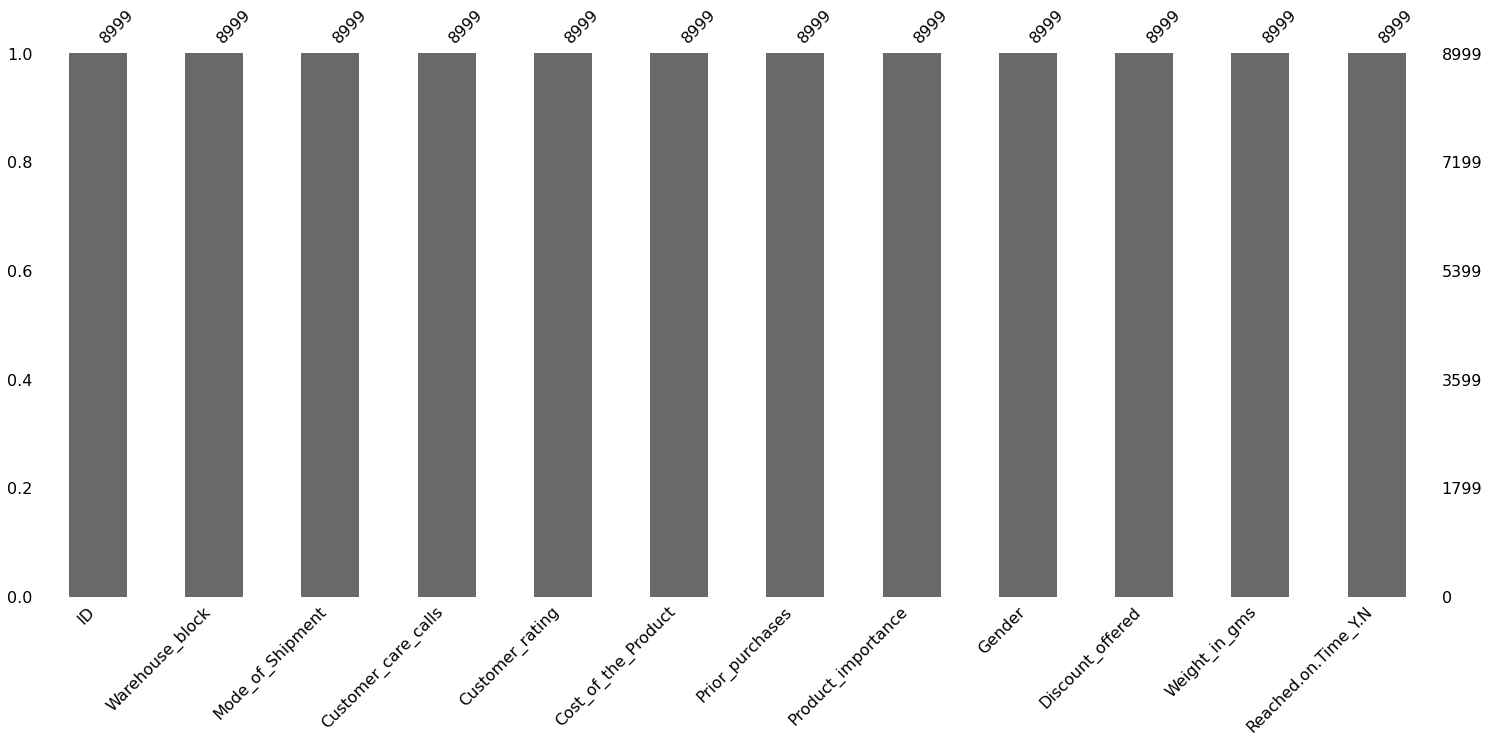

In [13]:
msno.bar(datos_train)
plt.show()

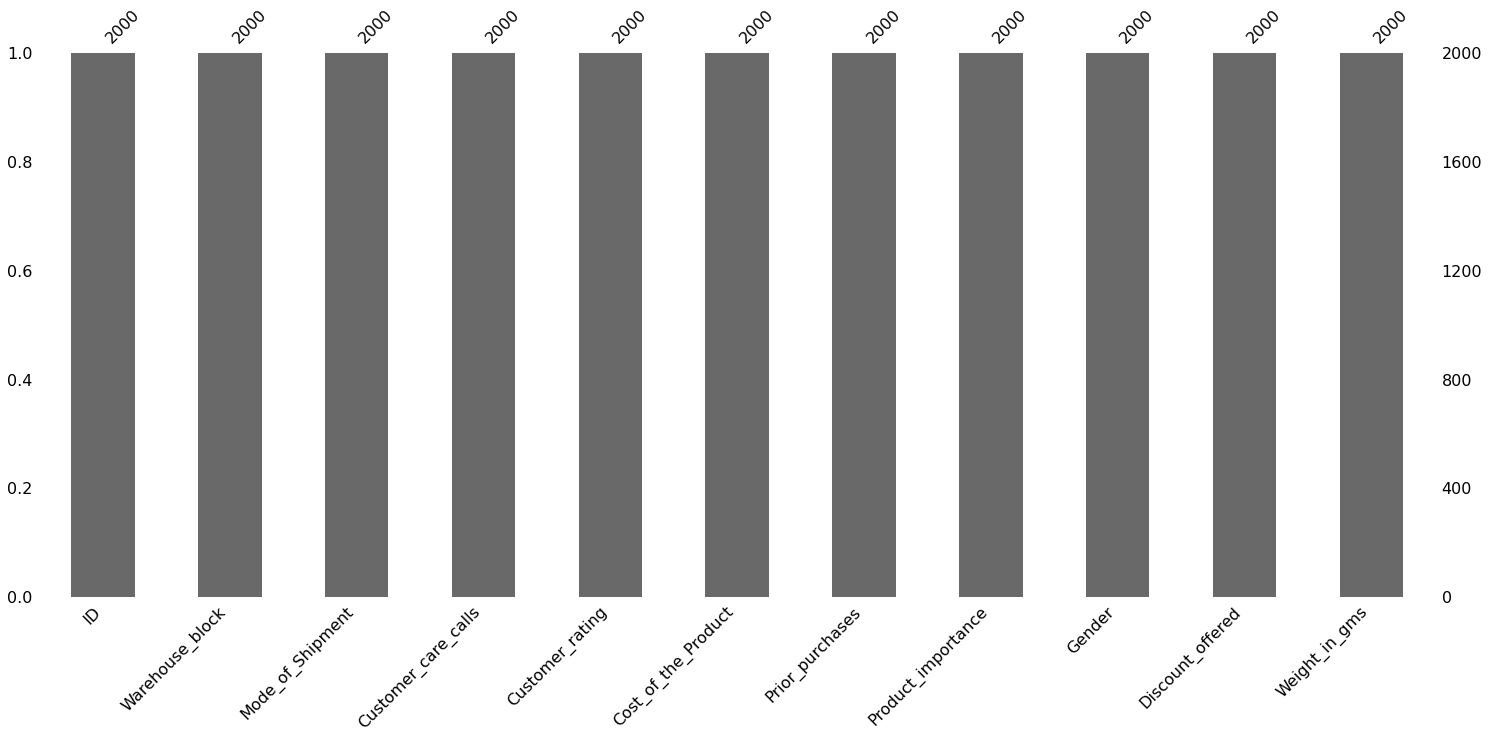

In [14]:
msno.bar(datos_test)
plt.show()

In [15]:
miss_values_count = datos_train.isnull().sum(min_count=1)

In [16]:
miss_values_count 

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [17]:
miss_values_count_2 = datos_test.isnull().sum(min_count=1)

In [18]:
miss_values_count_2

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [ ]:
#Confirmamos que no se encuentran valores nulos en los datasets datos_train y datos_test.

In [ ]:
#2.c- Verificamos la existencia de valores atípicos en cada columna  para lo que comparamos los valores para dicha columna en el dataset con la definición del rango que se indica para cada una en el READ ME.
#Para ello en las columnas con datos numéricos empleamos Diagramas de Cajas que nos permiten visualizar la distribución de valores y detectar rápidamente outliers.
# Mientras que en las columnas con valores discretos usamos el método "unique" que nos muestra los valores distintos que posee cada columna. 

In [ ]:
#Dataset datos_train

In [19]:
datos_train['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [20]:
datos_train['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [21]:
datos_train['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [22]:
datos_train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
datos_train['Reached.on.Time_Y.N'].unique()

array([1, 0], dtype=int64)

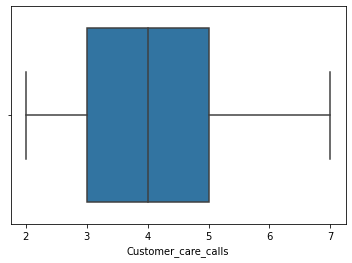

In [25]:
sns.boxplot(x = 'Customer_care_calls', data = datos_train)
plt.show()

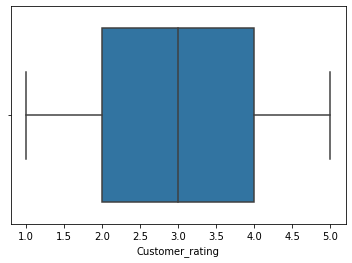

In [27]:
sns.boxplot(x = 'Customer_rating', data = datos_train)
plt.show()

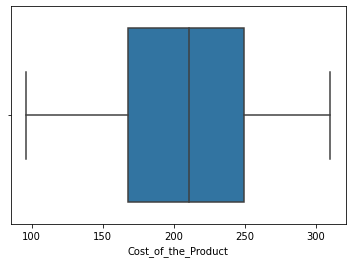

In [29]:
sns.boxplot(x = 'Cost_of_the_Product', data = datos_train)
plt.show()

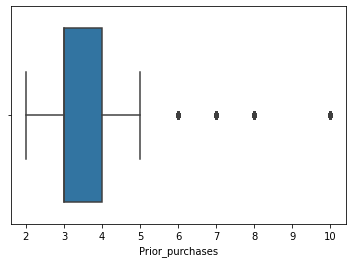

In [31]:
sns.boxplot(x = 'Prior_purchases', data = datos_train)
plt.show()

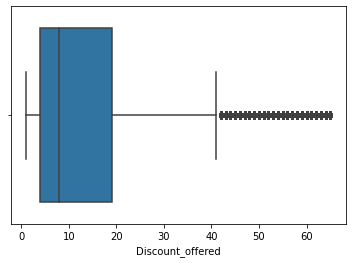

In [33]:
sns.boxplot(x = 'Discount_offered', data = datos_train)
plt.show()

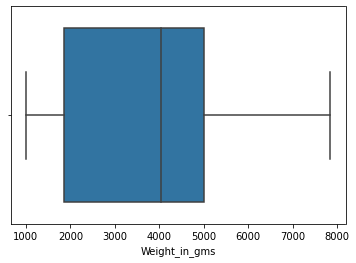

In [35]:
sns.boxplot(x = 'Weight_in_gms', data = datos_train)
plt.show()

In [ ]:
#Dataset datos_test

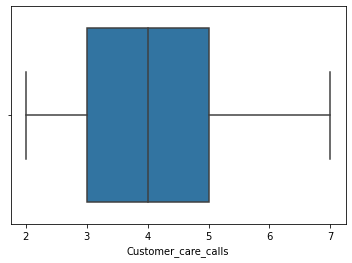

In [26]:
sns.boxplot(x = 'Customer_care_calls', data = datos_test)
plt.show()

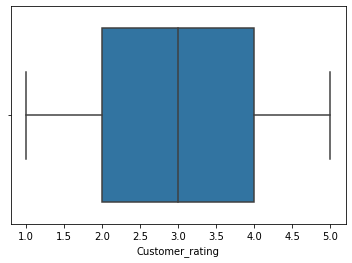

In [28]:
sns.boxplot(x = 'Customer_rating', data = datos_test)
plt.show()

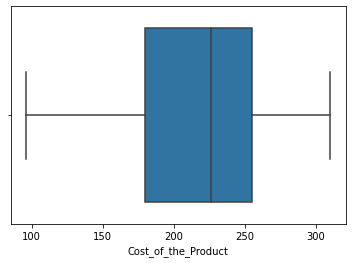

In [30]:
sns.boxplot(x = 'Cost_of_the_Product', data = datos_test)
plt.show()

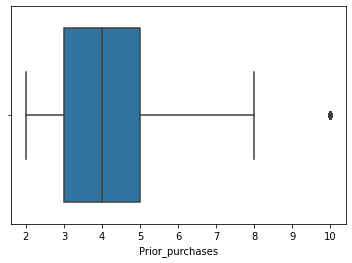

In [32]:
sns.boxplot(x = 'Prior_purchases', data = datos_test)
plt.show()

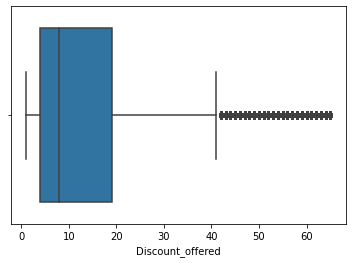

In [34]:
sns.boxplot(x = 'Discount_offered', data = datos_train)
plt.show()

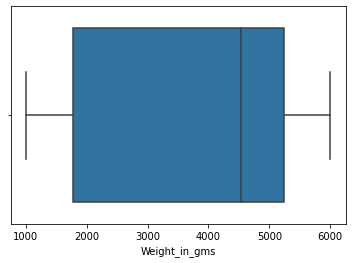

In [36]:
sns.boxplot(x = 'Weight_in_gms', data = datos_test)
plt.show()

In [42]:
datos_test['Warehouse_block'].unique()

array(['F', 'D', 'A', 'B', 'C'], dtype=object)

In [43]:
datos_test['Mode_of_Shipment'].unique()

array(['Ship', 'Road', 'Flight'], dtype=object)

In [44]:
datos_test['Product_importance'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [45]:
datos_test['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
#Confirmamos que no se encuentran valores atípicos (outliers) en los datasets datos_train y datos_test.

In [9]:
from sklearn import preprocessing

In [ ]:
#2.d- Codificación de variables categóricas

#Los modelos de Machine Learning solo entienden de números. Para ello, debemos transformar nuestros atributos del dataset que contengan datos cualitativos en cuantitativos.
#En primer lugar diferenciaremos las variables nominales de las variables ordinales.
#Variables nominales: Warehouse_block, Mode_of_Shipment, Gender. Las transformaremos usando One Hot Encoder.
#Variables ordinales: Product_importance. Las transformaremos usando Label Encoder.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
datos_train["Product_importance"] = encoder.fit_transform(datos_train["Product_importance"])

In [13]:
datos_train.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,1,F,44,1233,1
1,2,F,Flight,4,5,216,2,1,M,59,3088,1
2,3,A,Flight,2,2,183,4,1,M,48,3374,1
3,4,B,Flight,3,3,176,4,2,M,10,1177,1
4,5,C,Flight,2,2,184,3,2,F,46,2484,1
5,6,F,Flight,3,1,162,3,2,F,12,1417,1
6,7,D,Flight,3,4,250,3,1,F,3,2371,1
7,8,F,Flight,4,1,233,2,1,F,48,2804,1
8,9,A,Flight,3,4,150,3,1,F,11,1861,1
9,10,B,Flight,3,2,164,3,2,F,29,1187,1


In [14]:
datos_test["Product_importance"] = encoder.fit_transform(datos_test["Product_importance"])

In [15]:
datos_test.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,2,M,10,5248
1,9001,D,Ship,5,3,150,2,0,F,9,4446
2,9002,F,Ship,3,3,200,3,1,M,3,5739
3,9003,A,Ship,5,1,133,2,2,M,1,4643
4,9004,B,Ship,4,2,260,3,1,M,4,5504
5,9005,C,Ship,4,2,195,2,2,M,10,4640
6,9006,F,Ship,4,3,245,4,2,M,4,5940
7,9007,D,Ship,6,3,166,4,1,M,10,5783
8,9008,F,Ship,3,5,245,4,1,M,8,5600
9,9009,A,Ship,6,2,130,5,1,M,3,5654


In [ ]:
#Al verificar la transformación realizada en la columna Product_importance, vemos que se asignó el n°1: low, n°2: medium, n°0:high; por lo que realizamos un reemplazo de valores así nos queda n°0: low, n°1: medium, n°2:high

In [16]:
datos_train.Product_importance = datos_train.Product_importance.replace({1: 0, 2: 1,0:2})

In [17]:
datos_train.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,0,F,44,1233,1
1,2,F,Flight,4,5,216,2,0,M,59,3088,1
2,3,A,Flight,2,2,183,4,0,M,48,3374,1
3,4,B,Flight,3,3,176,4,1,M,10,1177,1
4,5,C,Flight,2,2,184,3,1,F,46,2484,1
5,6,F,Flight,3,1,162,3,1,F,12,1417,1
6,7,D,Flight,3,4,250,3,0,F,3,2371,1
7,8,F,Flight,4,1,233,2,0,F,48,2804,1
8,9,A,Flight,3,4,150,3,0,F,11,1861,1
9,10,B,Flight,3,2,164,3,1,F,29,1187,1


In [18]:
datos_test.Product_importance = datos_test.Product_importance.replace({1: 0, 2: 1,0:2})

In [19]:
datos_test.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,1,M,10,5248
1,9001,D,Ship,5,3,150,2,2,F,9,4446
2,9002,F,Ship,3,3,200,3,0,M,3,5739
3,9003,A,Ship,5,1,133,2,1,M,1,4643
4,9004,B,Ship,4,2,260,3,0,M,4,5504
5,9005,C,Ship,4,2,195,2,1,M,10,4640
6,9006,F,Ship,4,3,245,4,1,M,4,5940
7,9007,D,Ship,6,3,166,4,0,M,10,5783
8,9008,F,Ship,3,5,245,4,0,M,8,5600
9,9009,A,Ship,6,2,130,5,0,M,3,5654


In [ ]:
#Confirmamos que se encuentran la cantidad de datos correspondientes para low, medium y high en ambos datasets.

In [20]:
datos_test.Product_importance.value_counts()

0    989
1    896
2    115
Name: Product_importance, dtype: int64

In [21]:
datos_train.Product_importance.value_counts()

0    4308
1    3858
2     833
Name: Product_importance, dtype: int64

In [ ]:
#Continuamos con la transformación de las Variables nominales: Warehouse_block, Mode_of_Shipment, Gender. Como comentamos, usaremos One Hot Encoder.

In [22]:
datos_test.Warehouse_block.value_counts()

F    667
D    334
A    333
B    333
C    333
Name: Warehouse_block, dtype: int64

In [23]:
datos_train.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [24]:
datos_test.Mode_of_Shipment.value_counts()

Ship      1340
Road       330
Flight     330
Name: Mode_of_Shipment, dtype: int64

In [92]:
datos_train.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [93]:
datos_test.Gender.value_counts()

F    1005
M     995
Name: Gender, dtype: int64

In [95]:
datos_train.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder

datos_train_encoded = datos_train[['Warehouse_block']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
datos_train_encoded = pd.DataFrame(ohe.fit_transform(datos_train_encoded).toarray())

In [26]:
datos_train_encoded

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
8994,0.0,0.0,0.0,1.0,0.0
8995,0.0,0.0,0.0,0.0,1.0
8996,1.0,0.0,0.0,0.0,0.0
8997,0.0,1.0,0.0,0.0,0.0


In [27]:
# Incorporamos el dataframe codificado al dataframe original

datos_train_modif1 = datos_train.join(datos_train_encoded)

In [28]:
datos_train_modif1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,0,1,2,3,4
0,1,D,Flight,4,2,177,3,0,F,44,1233,1,0.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,0,M,59,3088,1,0.0,0.0,0.0,0.0,1.0
2,3,A,Flight,2,2,183,4,0,M,48,3374,1,1.0,0.0,0.0,0.0,0.0
3,4,B,Flight,3,3,176,4,1,M,10,1177,1,0.0,1.0,0.0,0.0,0.0
4,5,C,Flight,2,2,184,3,1,F,46,2484,1,0.0,0.0,1.0,0.0,0.0


In [29]:
datos_train_encoded2 = datos_train_modif1[['Mode_of_Shipment']]
ohe2 = OneHotEncoder(handle_unknown = 'ignore')
datos_train_encoded2 = pd.DataFrame(ohe2.fit_transform(datos_train_encoded2).toarray())

In [30]:
datos_train_encoded2

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
8994,0.0,0.0,1.0
8995,0.0,0.0,1.0
8996,0.0,0.0,1.0
8997,0.0,0.0,1.0


In [31]:
#Modificamos los nombres de las columnas de "datos_train_encoded2" para luego poder unirlo al dataframe "datos_train_modif1".
datos_train_encoded2.rename(columns={0: 'Flight',1: 'Road',2: 'Ship'}, inplace=True)

In [32]:
datos_train_encoded2

,Flight,Road,Ship
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
8994,0.0,0.0,1.0
8995,0.0,0.0,1.0
8996,0.0,0.0,1.0
8997,0.0,0.0,1.0


In [33]:
datos_train_modif1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,0,1,2,3,4
0,1,D,Flight,4,2,177,3,0,F,44,1233,1,0.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,0,M,59,3088,1,0.0,0.0,0.0,0.0,1.0
2,3,A,Flight,2,2,183,4,0,M,48,3374,1,1.0,0.0,0.0,0.0,0.0
3,4,B,Flight,3,3,176,4,1,M,10,1177,1,0.0,1.0,0.0,0.0,0.0
4,5,C,Flight,2,2,184,3,1,F,46,2484,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,0,F,1,4177,1,0.0,0.0,0.0,1.0,0.0
8995,8996,F,Ship,5,3,232,3,1,M,3,4526,0,0.0,0.0,0.0,0.0,1.0
8996,8997,A,Ship,4,5,260,3,1,F,6,4221,0,1.0,0.0,0.0,0.0,0.0
8997,8998,B,Ship,4,2,184,3,1,F,5,5931,1,0.0,1.0,0.0,0.0,0.0


In [34]:
# Incorporamos el dataframe codificado al dataframe original

datos_train_modif2 = datos_train_modif1.join(datos_train_encoded2)

In [35]:
datos_train_modif2.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,0,1,2,3,4,Flight,Road,Ship
0,1,D,Flight,4,2,177,3,0,F,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,F,Flight,4,5,216,2,0,M,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,A,Flight,2,2,183,4,0,M,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,B,Flight,3,3,176,4,1,M,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,C,Flight,2,2,184,3,1,F,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,6,F,Flight,3,1,162,3,1,F,12,1417,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,7,D,Flight,3,4,250,3,0,F,3,2371,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,8,F,Flight,4,1,233,2,0,F,48,2804,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,9,A,Flight,3,4,150,3,0,F,11,1861,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,B,Flight,3,2,164,3,1,F,29,1187,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
#Modificamos el nombre de las columnas correspondientes a Warehouse_block, no se incluye la E al verificar que no se encuentra en los Datasets.
datos_train_modif2.rename(columns={0: 'A',1: 'B',2: 'C',3: 'D',4: 'F'}, inplace=True)

In [37]:
datos_train_modif2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,C,D,F,Flight,Road,Ship
0,1,D,Flight,4,2,177,3,0,F,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,F,Flight,4,5,216,2,0,M,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,A,Flight,2,2,183,4,0,M,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,B,Flight,3,3,176,4,1,M,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,C,Flight,2,2,184,3,1,F,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
#Repetimos el procedimiento con la variable nominal "Gender".
datos_train_encoded3 = datos_train_modif2[['Gender']]
ohe3 = OneHotEncoder(handle_unknown = 'ignore')
datos_train_encoded3 = pd.DataFrame(ohe3.fit_transform(datos_train_encoded3).toarray())

In [39]:
datos_train_encoded3

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
8994,1.0,0.0
8995,0.0,1.0
8996,1.0,0.0
8997,1.0,0.0


In [40]:
#Modificamos los nombres de las columnas de "datos_train_encoded3" 
datos_train_encoded3.rename(columns={0: 'Fem',1: 'Masc'}, inplace=True)

In [41]:
datos_train_encoded3

,Fem,Masc
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
8994,1.0,0.0
8995,0.0,1.0
8996,1.0,0.0
8997,1.0,0.0


In [42]:
# Incorporamos el dataframe codificado al dataframe original

datos_train_modif3 = datos_train_modif2.join(datos_train_encoded3)

In [43]:
datos_train_modif3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,A,B,C,D,F,Flight,Road,Ship,Fem,Masc
0,1,D,Flight,4,2,177,3,0,F,44,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,0,M,59,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,3,A,Flight,2,2,183,4,0,M,48,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,B,Flight,3,3,176,4,1,M,10,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,C,Flight,2,2,184,3,1,F,46,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Repetimos el procedimiento con los datos de Test.

In [44]:
datos_test_encoded = datos_test[['Warehouse_block']]
ohe_1 = OneHotEncoder(handle_unknown = 'ignore')
datos_test_encoded = pd.DataFrame(ohe_1.fit_transform(datos_test_encoded).toarray())

In [45]:
datos_test_encoded

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0
1996,0.0,1.0,0.0,0.0,0.0
1997,0.0,0.0,1.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,1.0


In [46]:
datos_test_encoded.rename(columns={0: 'A',1: 'B',2: 'C',3: 'D',4: 'F'}, inplace=True)

In [47]:
datos_test_encoded

,A,B,C,D,F
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0
1996,0.0,1.0,0.0,0.0,0.0
1997,0.0,0.0,1.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,1.0


In [48]:
# Incorporamos el dataframe codificado al dataframe original

datos_test_modif1 = datos_test.join(datos_test_encoded)

In [49]:
datos_test_modif1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,A,B,C,D,F
0,9000,F,Ship,5,1,189,2,1,M,10,5248,0.0,0.0,0.0,0.0,1.0
1,9001,D,Ship,5,3,150,2,2,F,9,4446,0.0,0.0,0.0,1.0,0.0
2,9002,F,Ship,3,3,200,3,0,M,3,5739,0.0,0.0,0.0,0.0,1.0
3,9003,A,Ship,5,1,133,2,1,M,1,4643,1.0,0.0,0.0,0.0,0.0
4,9004,B,Ship,4,2,260,3,0,M,4,5504,0.0,1.0,0.0,0.0,0.0


In [50]:
datos_test_encoded2 = datos_test_modif1[['Mode_of_Shipment']]
ohe_2 = OneHotEncoder(handle_unknown = 'ignore')
datos_test_encoded2 = pd.DataFrame(ohe_2.fit_transform(datos_test_encoded2).toarray())

In [51]:
datos_test_encoded2.head(20)

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [52]:
datos_test_encoded2.rename(columns={0: 'Flight',1: 'Road',2: 'Ship'}, inplace=True)

In [53]:
datos_test_encoded2

,Flight,Road,Ship
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
1995,0.0,0.0,1.0
1996,0.0,0.0,1.0
1997,0.0,0.0,1.0
1998,0.0,0.0,1.0


In [54]:
datos_test_modif2 = datos_test_modif1.join(datos_test_encoded2)

In [55]:
datos_test_modif2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship
0,9000,F,Ship,5,1,189,2,1,M,10,5248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,9001,D,Ship,5,3,150,2,2,F,9,4446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9002,F,Ship,3,3,200,3,0,M,3,5739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,9003,A,Ship,5,1,133,2,1,M,1,4643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9004,B,Ship,4,2,260,3,0,M,4,5504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
datos_test_encoded3 = datos_test_modif2[['Gender']]
ohe_3 = OneHotEncoder(handle_unknown = 'ignore')
datos_test_encoded3 = pd.DataFrame(ohe_3.fit_transform(datos_test_encoded3).toarray())

In [57]:
datos_test_encoded3.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [58]:
datos_test_encoded3.rename(columns={0: 'Fem',1: 'Masc'}, inplace=True)

In [59]:
datos_test_modif3 = datos_test_modif2.join(datos_test_encoded3)

In [60]:
datos_test_modif3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,A,B,C,D,F,Flight,Road,Ship,Fem,Masc
0,9000,F,Ship,5,1,189,2,1,M,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,9001,D,Ship,5,3,150,2,2,F,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,9002,F,Ship,3,3,200,3,0,M,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,9003,A,Ship,5,1,133,2,1,M,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,9004,B,Ship,4,2,260,3,0,M,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#Realizamos una última verificación de que hemos realizado las transformaciones correctamente.

In [61]:
datos_test.Warehouse_block.value_counts()

F    667
D    334
A    333
B    333
C    333
Name: Warehouse_block, dtype: int64

In [62]:
datos_test_modif3.Warehouse_block.value_counts()

F    667
D    334
A    333
B    333
C    333
Name: Warehouse_block, dtype: int64

In [63]:
datos_test.Mode_of_Shipment.value_counts()

Ship      1340
Road       330
Flight     330
Name: Mode_of_Shipment, dtype: int64

In [64]:
datos_test_modif3.Mode_of_Shipment.value_counts()

Ship      1340
Road       330
Flight     330
Name: Mode_of_Shipment, dtype: int64

In [65]:
datos_test.Gender.value_counts()

F    1005
M     995
Name: Gender, dtype: int64

In [66]:
datos_test_modif3.Gender.value_counts()

F    1005
M     995
Name: Gender, dtype: int64

In [67]:
datos_train.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [68]:
datos_train_modif3.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [69]:
datos_train.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [70]:
datos_train_modif3.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [71]:
datos_train.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [72]:
datos_train_modif3.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [ ]:
#2.e- En nuestro dataset contamos con distintas variables, medidas en diferentes unidades y con distintas escalas. Por lo que realizaremos un escalado mín-máx

In [73]:
datos_test_modif4=datos_test_modif3.drop(['Warehouse_block','Mode_of_Shipment','Gender' ],axis=1)

In [74]:
datos_test_modif4.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,Fem,Masc
0,9000,5,1,189,2,1,10,5248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,9001,5,3,150,2,2,9,4446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,9002,3,3,200,3,0,3,5739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,9003,5,1,133,2,1,1,4643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,9004,4,2,260,3,0,4,5504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
datos_test_modif4_escalado = scaler.fit_transform(datos_test_modif4.iloc[:])

In [78]:
datos_test_modif4_escalado

array([[0.00000000e+00, 6.00000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00250125e-04, 6.00000000e-01, 5.00000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00050025e-03, 2.00000000e-01, 5.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.98999500e-01, 6.00000000e-01, 7.50000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99499750e-01, 6.00000000e-01, 2.50000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [79]:
datos_test_modif4_escalado_df=pd.DataFrame(datos_test_modif4_escalado)

In [80]:
datos_test_modif4_escalado_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.6,0.00,0.434579,0.000,0.5,1.000000,0.849510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.000500,0.6,0.50,0.252336,0.000,1.0,0.888889,0.689013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.001001,0.2,0.50,0.485981,0.125,0.0,0.222222,0.947769,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.001501,0.6,0.00,0.172897,0.000,0.5,0.000000,0.728437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.002001,0.4,0.25,0.766355,0.125,0.0,0.333333,0.900740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.997999,0.4,0.00,0.728972,0.375,0.5,0.000000,0.107064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,0.998499,0.4,0.00,0.635514,0.375,0.5,0.555556,0.048829,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1997,0.998999,0.6,0.75,0.682243,0.375,0.0,0.333333,0.030418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,0.999500,0.6,0.25,0.593458,0.500,0.5,0.111111,0.041425,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [81]:
#Modificamos los nombres de las columnas para mantener los originales.
datos_test_modif4_escalado_df.columns=['ID', 'Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases'	,'Product_importance','Discount_offered','Weight_in_gms','A','B','C','D','F', 'Flight','Road','Ship','Fem','Masc']

In [82]:
datos_test_modif4_escalado_df.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms', 'A', 'B', 'C', 'D', 'F', 'Flight', 'Road', 'Ship',
       'Fem', 'Masc'],
      dtype='object')

In [83]:
datos_test_modif4_escalado_df

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,Fem,Masc
0,0.000000,0.6,0.00,0.434579,0.000,0.5,1.000000,0.849510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.000500,0.6,0.50,0.252336,0.000,1.0,0.888889,0.689013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.001001,0.2,0.50,0.485981,0.125,0.0,0.222222,0.947769,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.001501,0.6,0.00,0.172897,0.000,0.5,0.000000,0.728437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.002001,0.4,0.25,0.766355,0.125,0.0,0.333333,0.900740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.997999,0.4,0.00,0.728972,0.375,0.5,0.000000,0.107064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1996,0.998499,0.4,0.00,0.635514,0.375,0.5,0.555556,0.048829,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1997,0.998999,0.6,0.75,0.682243,0.375,0.0,0.333333,0.030418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1998,0.999500,0.6,0.25,0.593458,0.500,0.5,0.111111,0.041425,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#Repetimos el procedimiento con datos_train_modif

In [84]:
datos_train_modif4=datos_train_modif3.drop(['Warehouse_block','Mode_of_Shipment','Gender' ],axis=1)

In [85]:
datos_train_modif4.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,C,D,F,Flight,Road,Ship,Fem,Masc
0,1,4,2,177,3,0,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,4,5,216,2,0,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,3,2,2,183,4,0,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,3,3,176,4,1,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,2,2,184,3,1,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [86]:
datos_train_modif4_escalado = scaler.fit_transform(datos_train_modif4.iloc[:])

In [87]:
datos_train_modif4_escalado

array([[0.00000000e+00, 4.00000000e-01, 2.50000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.11135808e-04, 4.00000000e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.22271616e-04, 0.00000000e+00, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99777728e-01, 4.00000000e-01, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99888864e-01, 4.00000000e-01, 2.50000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.00000000e-01, 7.50000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [88]:
datos_train_modif4_escalado_df=pd.DataFrame(datos_train_modif4_escalado)

In [89]:
datos_train_modif4_escalado_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000111,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.000222,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000333,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000445,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,0.999555,0.2,0.00,0.565421,0.125,0.0,0.000000,0.463988,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8995,0.999667,0.6,0.50,0.635514,0.125,0.5,0.031250,0.514974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8996,0.999778,0.4,1.00,0.766355,0.125,0.5,0.078125,0.470416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8997,0.999889,0.4,0.25,0.411215,0.125,0.5,0.062500,0.720234,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [90]:
#Modificamos los nombres de las columnas para mantener los originales.
datos_train_modif4_escalado_df.columns=['ID', 'Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases'	,'Product_importance','Discount_offered','Weight_in_gms','A','B','C','D','F', 'Flight','Road','Ship','Fem','Masc','Reached.on.Time_Y.N']

In [91]:
datos_train_modif4_escalado_df.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms', 'A', 'B', 'C', 'D', 'F', 'Flight', 'Road', 'Ship',
       'Fem', 'Masc', 'Reached.on.Time_Y.N'],
      dtype='object')

In [92]:
datos_train_modif4_escalado_df

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,Fem,Masc,Reached.on.Time_Y.N
0,0.000000,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000111,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.000222,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000333,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000445,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,0.999555,0.2,0.00,0.565421,0.125,0.0,0.000000,0.463988,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8995,0.999667,0.6,0.50,0.635514,0.125,0.5,0.031250,0.514974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8996,0.999778,0.4,1.00,0.766355,0.125,0.5,0.078125,0.470416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8997,0.999889,0.4,0.25,0.411215,0.125,0.5,0.062500,0.720234,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#2.f-Selección de atributos relevantes/reducción de la dimensionalidad
#Analizamos la relación de las columnas con la variable objetivo (Reached.on.Time_Y.N) y eliminamos los ID y el género (Fem,Masc) puesto que no aportan información nueva sobre el conjunto de datos.

In [95]:
datos_train_modif5_escalado_df=datos_train_modif4_escalado_df.drop(['ID','Masc','Fem'],axis=1)

In [96]:
datos_train_modif5_escalado_df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,Reached.on.Time_Y.N
0,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [103]:
datos_test_modif5_escalado_df=datos_test_modif4_escalado_df.drop(['ID','Masc','Fem'],axis=1)

In [104]:
datos_test_modif5_escalado_df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship
0,0.6,0.00,0.434579,0.000,0.5,1.000000,0.849510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.6,0.50,0.252336,0.000,1.0,0.888889,0.689013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.2,0.50,0.485981,0.125,0.0,0.222222,0.947769,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.6,0.00,0.172897,0.000,0.5,0.000000,0.728437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.4,0.25,0.766355,0.125,0.0,0.333333,0.900740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


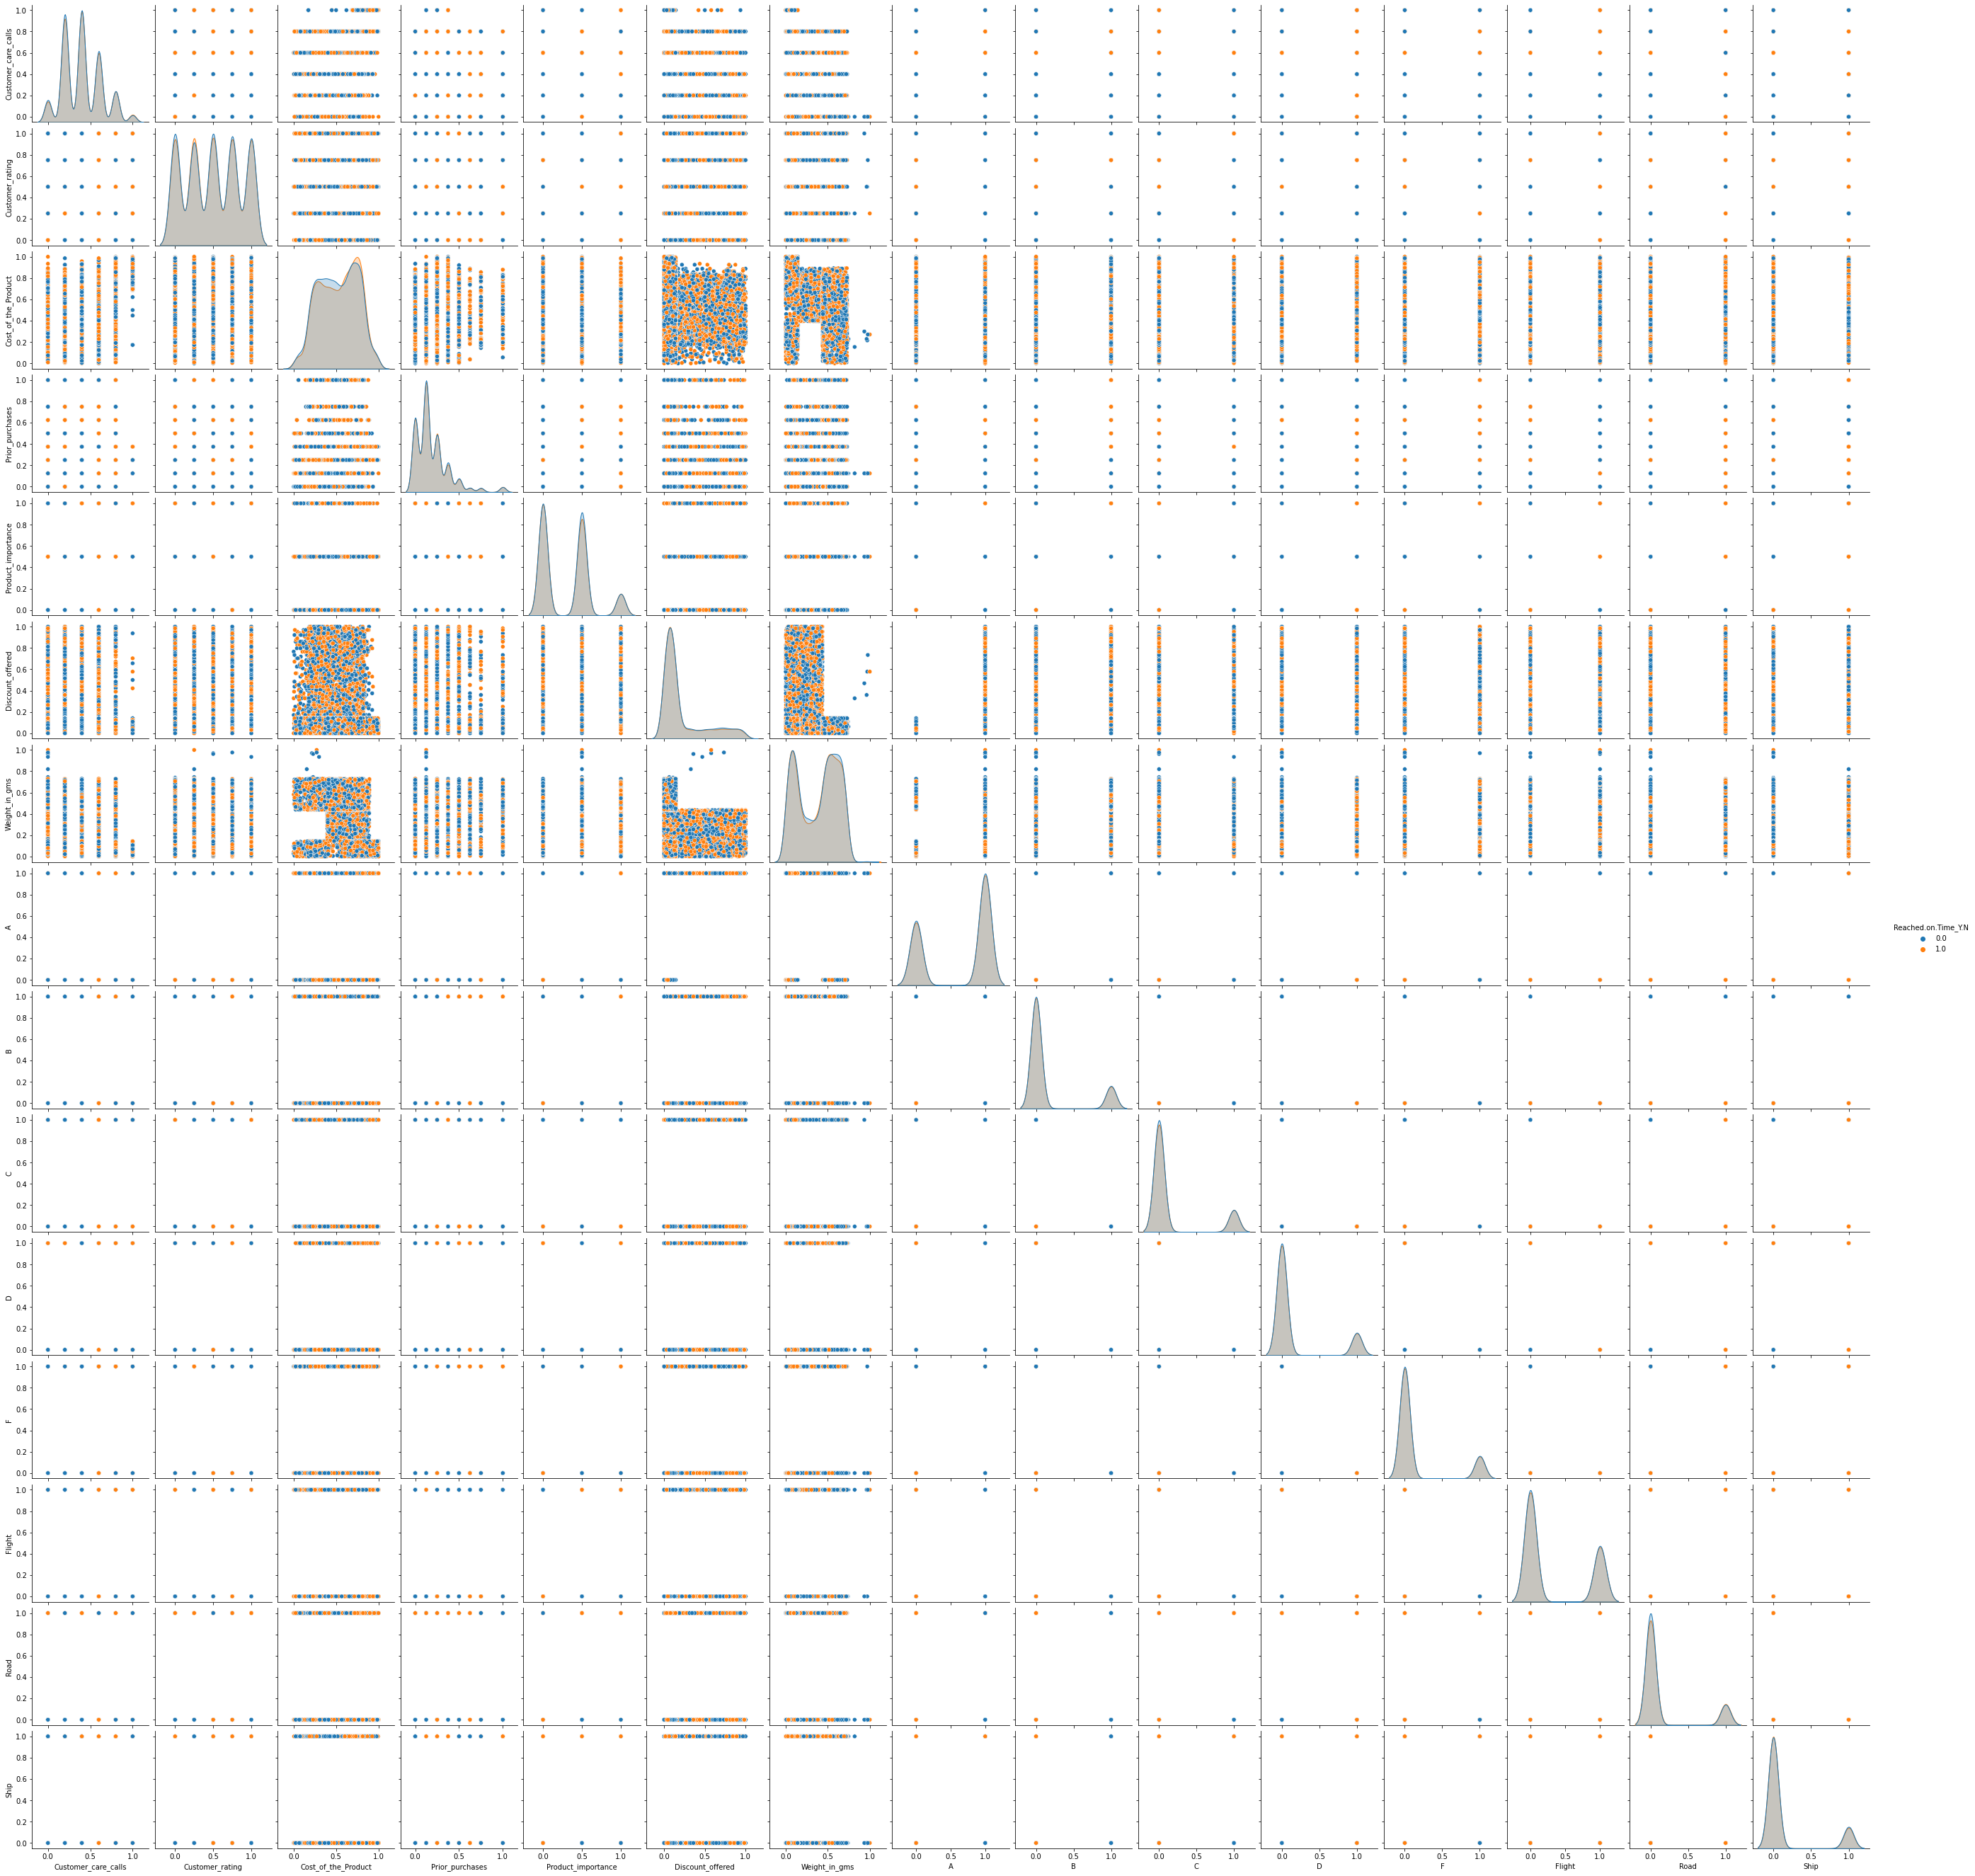

In [106]:
sns.pairplot(datos_train_modif5_escalado_df, hue="Reached.on.Time_Y.N")
plt.show()

In [ ]:
#Realizamos el mapa de calor para detectar variables redundantes.

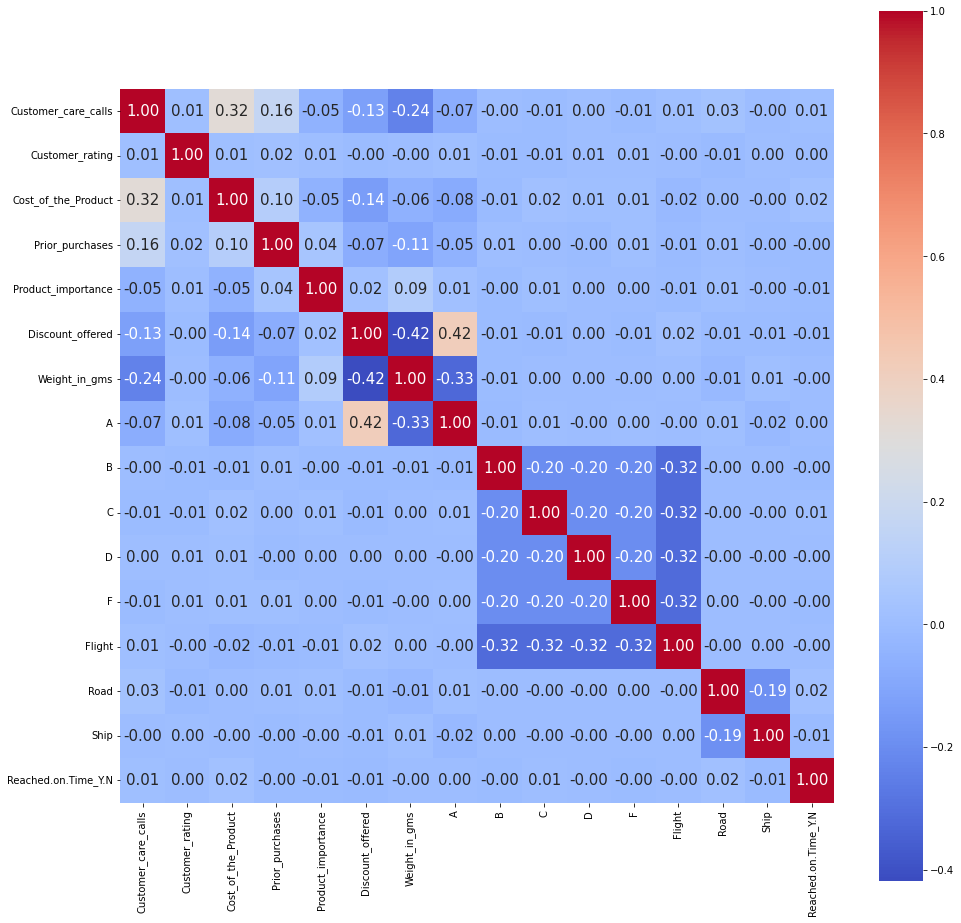

In [102]:
corr = datos_train_modif5_escalado_df.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datos_train_modif5_escalado_df.columns, 
           yticklabels= datos_train_modif5_escalado_df.columns,
           cmap= 'coolwarm')

plt.show()

In [ ]:
corr = datos_train_modif5_escalado_df.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datos_train_modif5_escalado_df.columns, 
           yticklabels= datos_train_modif5_escalado_df.columns,
           cmap= 'coolwarm')

plt.show()

In [ ]:
#No se observan variables con alta correlación, que indiquen que puedan ser eliminadas del análisis.

In [ ]:
#3.-

In [108]:
X = datos_train_modif5_escalado_df[['Cost_of_the_Product', 'Discount_offered']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y = datos_train_modif5_escalado_df['Reached.on.Time_Y.N'] # Etiqueta a predecir

In [109]:
X.head()

,Cost_of_the_Product,Discount_offered
0,0.378505,0.671875
1,0.560748,0.906250
2,0.406542,0.734375
3,0.373832,0.140625
4,0.411215,0.703125


In [110]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Reached.on.Time_Y.N, dtype: float64

In [111]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

In [112]:
# Entrenamos el modelo

clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [113]:
# Predecimos

y_pred = clf.predict(X.values)

In [114]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.5209467718635404


In [119]:
from sklearn.metrics import recall_score

print(recall_score (y,y_pred))

0.4873289975330792


In [115]:
y_pred

array([0., 1., 0., ..., 1., 0., 0.])

In [117]:
y_pred_obtenido=pd.DataFrame(y_pred)

In [118]:
y_pred_obtenido

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
8994,0.0
8995,1.0
8996,1.0
8997,0.0


In [123]:
X = datos_test_modif5_escalado_df[['Cost_of_the_Product', 'Discount_offered']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y_pred_test = clf.predict(X.values) # Etiqueta a predecir

In [124]:
y_pred_test

array([0., 0., 0., ..., 1., 1., 0.])

In [126]:
y_pred_test_out=pd.DataFrame(y_pred_test)

In [129]:
y_pred_test_out.to_csv('mpruizjaimes.csv', index=False)

In [125]:
from sklearn.model_selection import train_test_split